# The Garage Problem: Real Estate Recommendations for Kings County California

![garage](http://nccarpentry.com/uploads/3/4/1/7/34171415/1441711_orig.jpg)
    
By Jordan Loewen-Colón October 14th 2022

## The Business Problem

King's County Realtors are interested in whether or not they should rennovate homes before trying to sell. Specifically, they'd like to know how much adding a garage might affect price, and if so, what size of garage.

## Recommendations:

Based on our models and analysis, it we recommend

## Step 1: Data Understanding

We will analyze the 2022 data from King's Country to try and offer accurate recommendations.

We begin by importing the proper tools and then the data itself.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

#Import data
kcdf=pd.read_csv(r"C:\Users\legac\data\kc_house_data.csv")

In [2]:
#view data
print(kcdf.shape)
kcdf.info()

(30155, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  

The dataset has 30155 entries and 25 columns with a mix of string values, floats, and integers. Bathrooms as float makes sense, but "floors" as float seems odd. It is not clear what elements are contained in some of the object categories like "grade" or "nuisance." It also looks like we have some missing entries for "sewer_system" and "heat_source." Let's take a closer look at the data entries.

In [3]:
kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


It looks like there are some houses with no garages or which have never been renovated. It's also not clear how some of these columns are going to help us answer our problem, so we will probably end up focusing primarily on "yr_renovated," and the "sqft" categories. Now that we have some idea of what the values of the columns look like, let's sort by values (specifically "price") to see if we notice any outliers.

In [4]:
kcdf.describe().sort_values("price")

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Some odd things to notice here is that there seem to be houses without bedrooms or bathrooms. It also looks like there might be some outliers on the larger end as well, with houses containing 13 bedrooms and 10.5 bathrooms. Also looks like there might be a house with only 3sqft of living space, so we are going to have to fix that. We're also going to need to seperate out the houses that already have garages from those that do not. But before that, let's check for duplicates.

In [5]:
# Check for duplicates
kcdf.duplicated(subset = ["id", "date"]).sum() == 0

False

So this is going to be a problem. We will need to remove them.

In [6]:
#Checking Outliers
print(kcdf['bedrooms'].value_counts())
print(kcdf['bathrooms'].value_counts())

3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64
2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
0.0       31
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64


It's also still not clear how useful some of the other categories will be for getting an accurate answer to our problem. Spefically with "waterfront", "greenbelt", "nuisance", "condition", and "grade."

In [7]:
#Checking Values of Categories
print(kcdf['waterfront'].value_counts())
print(kcdf['greenbelt'].value_counts())
print(kcdf['nuisance'].value_counts())
print(kcdf['condition'].value_counts())
print(kcdf['grade'].value_counts())

NO     29636
YES      519
Name: waterfront, dtype: int64
NO     29382
YES      773
Name: greenbelt, dtype: int64
NO     24893
YES     5262
Name: nuisance, dtype: int64
Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64
7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64


With such small values in the "waterfront", "greenbelt", and "nuisance" categories, those are probably ripe for dropping. It looks like if we dropped some of the outliers for "grade" it might end up being useful. And "condition" could be worth keeping to see how it affects our renovation coefficients. We can double check our intuition by visualizing some of the data already.

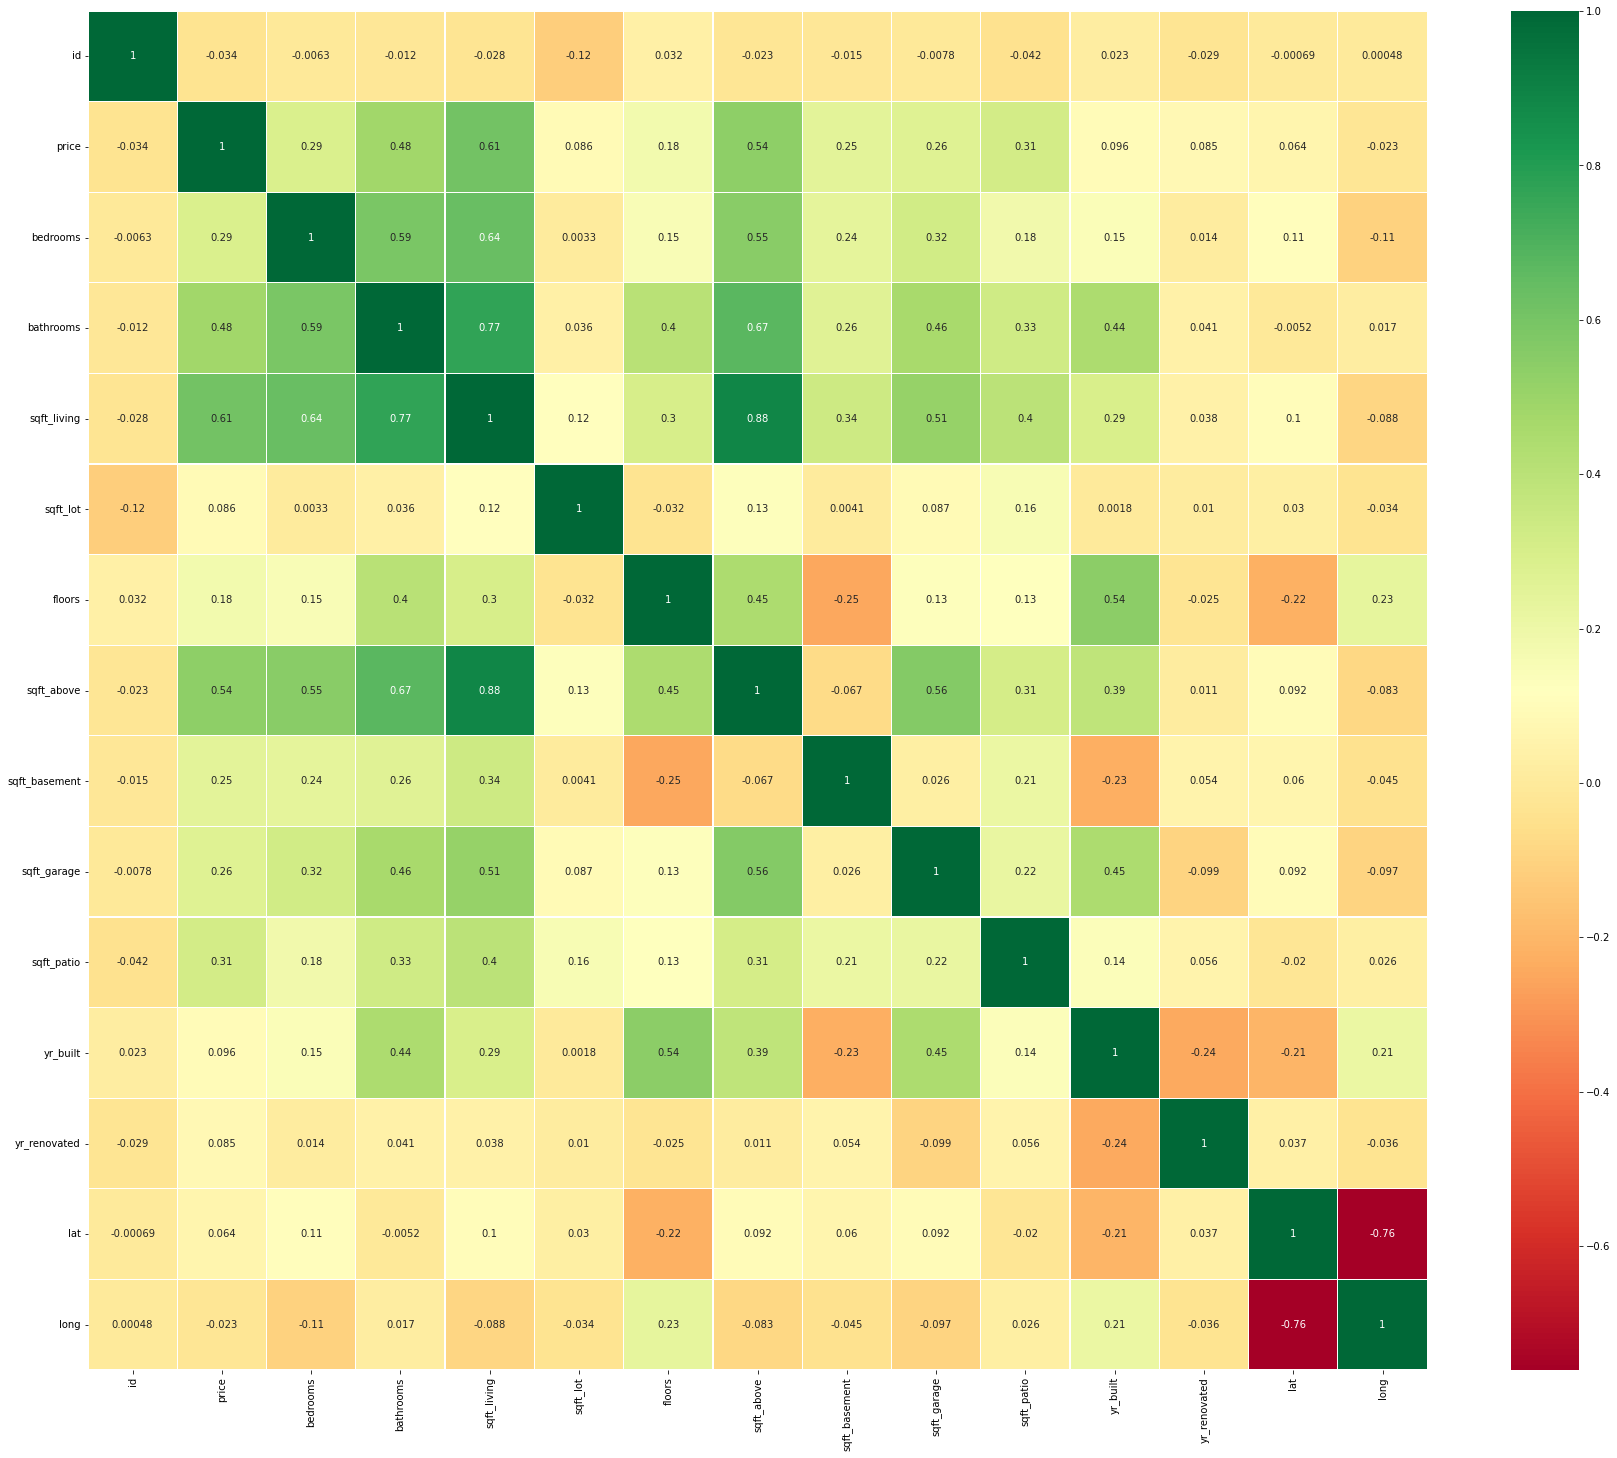

In [8]:
#Checking For multicollinearity
#Pearson Corellation
sns.heatmap(kcdf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(30,25)
plt.show()

According to the our Pearson corellation calculations, our intuitions look right. We can drop quite a few of these categories that seem to have minimal relevance to our "price." 


## Step 2: Data Preperation

* In preparing the data, we will primarily focus on elements we think will affect our numbers involving renovations broadly, and garage additions more specifically. Since we are dealing with both continuous numbers and integers, we may end up needing some log transformations. We will test our model by looking at the correlation between price per sqft of house. According to according to the website www.fixr.com the cost of building a home in California is roughly "400 and 600 per square foot." So that will be a good target for checking the accuracy of our data prep.

In [9]:
#Create a copy of DataFrame for preperation
df = kcdf.copy(deep=True)

In [10]:
#Dropping Duplicates
df.drop_duplicates(subset=['id', 'date'])

#Dropping Columns
df.drop(['date', 'view', 'lat', 'long', 'floors', 'address', 'sqft_above', 'sqft_basement', 'waterfront', 'greenbelt', 'sewer_system', 'heat_source'], axis=1, inplace=True)

#No need to drop "NaNs" because we won't be using the sewer or heating columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            30155 non-null  int64  
 1   price         30155 non-null  float64
 2   bedrooms      30155 non-null  int64  
 3   bathrooms     30155 non-null  float64
 4   sqft_living   30155 non-null  int64  
 5   sqft_lot      30155 non-null  int64  
 6   nuisance      30155 non-null  object 
 7   condition     30155 non-null  object 
 8   grade         30155 non-null  object 
 9   sqft_garage   30155 non-null  int64  
 10  sqft_patio    30155 non-null  int64  
 11  yr_built      30155 non-null  int64  
 12  yr_renovated  30155 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 3.0+ MB


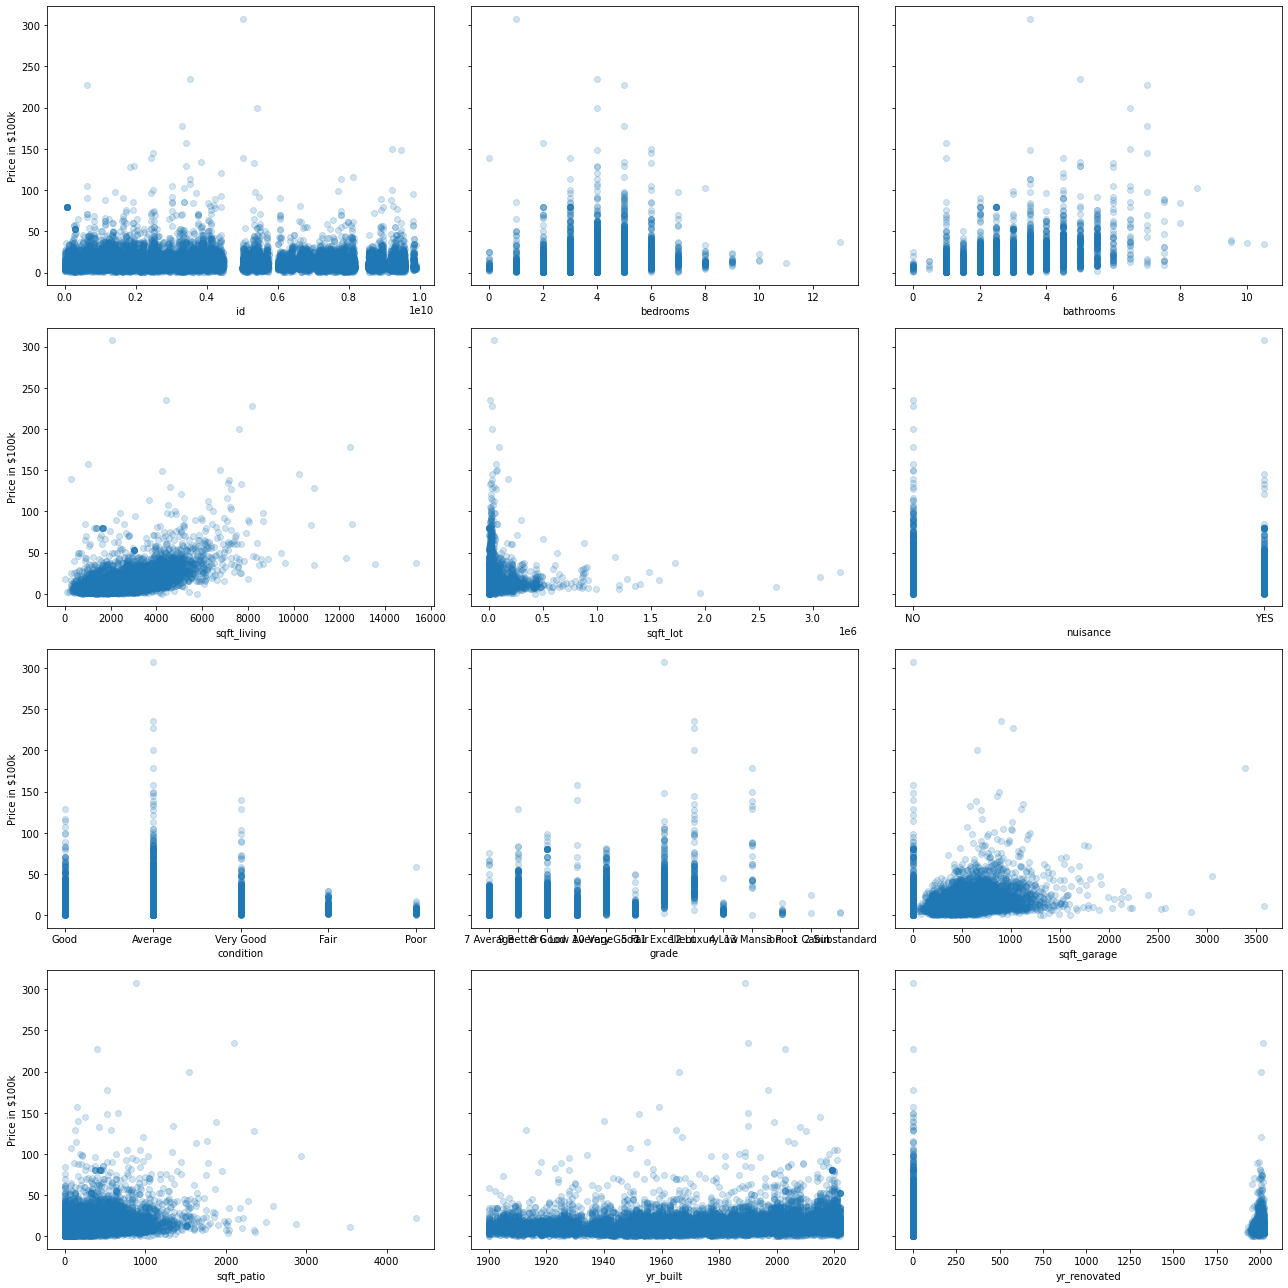

In [11]:
#Visualizing new dataframe for correlations
y = df["price"]/100000
x = df.drop("price", axis=1)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18,18), sharey=True)

for i, column in enumerate(x.columns):
    # Locate applicable axes
    row = i // 3
    col = i % 3
    ax = axes[row][col]
    
    # Plot feature vs. y and label axes
    ax.scatter(x[column], y, alpha=0.2)
    ax.set_xlabel(column)
    if col == 0:
        ax.set_ylabel("Price in $100k")

fig.tight_layout()

Looks like we will need to fix the outliers in bedrooms, bathrooms, and our sqft columns. We will also have to adjust "yr_renovated" to make it more useful, and make a category frame for whether a home house a garage or not.

In [12]:
#Deal with easy Outliers

print('Shape before filtering', df.shape)

#Remove "mansion" level houses and foreclosures (based on forclosure listings)
df.drop(df[(df['price']>=5000000) | (df['price']<=300000)].index, inplace = True)

#A House must have a bedroom and a bathroom. Mansions are such an outlier that our model won't make much use of them.
df.drop(df[(df['bedrooms']==0) | (df['bedrooms']>=10)].index, inplace = True)
df.drop(df[(df['bathrooms']==0) | (df['bedrooms']>=8)].index, inplace = True)

#Drop anything well below "small home" and "mansion" sized in sqft_living
df.drop(df[(df['sqft_living']<=500) | (df['sqft_living']>=9000)].index, inplace = True)

#Drop massive sized garages
df.drop(df[(df['sqft_garage']>=800)].index, inplace = True)

print('Shape after filtering', df.shape)

Shape before filtering (30155, 13)
Shape after filtering (27972, 13)


So after filtering, we lost about 2183 rows. We probably still have room to finetune the data by doing some logarithimic transformations, normalization, and removing outliers within three standard deviations. But we will save that for after we've done some baseline modeling below.

Next! Since we are specifically looking to answer the question about "rennovations" we will prepare our data by creating a column that determines whether or not a home has been renovated at all.

In [13]:
df['renovated']=''
def determine_reno(df):
    t=''
    x=df['yr_renovated']
    if(x==0):
        t='No'
    elif(x>0):
        t='Yes'
    return t

df['renovated']=df.apply(determine_reno,axis=1)
df.renovated.value_counts()

No     26713
Yes     1259
Name: renovated, dtype: int64

Since there aren't actually that many renovated houses in our data set, we won't bother trying to see how "recency" might affect the price.

Next, we will do a similar adjustment with our garage data. First checking to see which houses actually have a garage, and then checking to see how big. According to [ShedsUnlimited](https://shedsunlimited.net/blog/how-large-is-a-one-car-garage/#:~:text=The%20minimum%20size%20of%20a,garage%20to%20fit%20inside%20comfortably.) the minimum size for a garage is 180ft, but really should be about 240ft in order to actually fit a car.

In [14]:
#Create a function to seperate homes with a grage from those without
df['garage']=''
def determine_garage(df):
    t=''
    x=df['sqft_garage']
    if(x<=239):
        t='No'
    elif(x>=240):
        t='Yes'
    return t

df['garage']=df.apply(determine_garage,axis=1)
df.garage.value_counts()

Yes    16961
No     11011
Name: garage, dtype: int64

In [15]:
#Create a function to categorize by size of garage
df['garage_size']=''
def garage_sizer(df):
    t=''
    x=df['sqft_garage']
    if(x<=239):
        t='None'
    elif(x>=240 and x<=359):
        t='Small'
    elif(x>=360 and x<=704):
        t='Medium'
    elif(x>704):
        t='Large'
    return t

df['garage_size']=df.apply(garage_sizer,axis=1)
df.garage_size.value_counts()

Medium    13276
None      11011
Small      2616
Large      1069
Name: garage_size, dtype: int64

With our garage size categories, it looks like we have a nice set of numbers to work with on our models. We may still need to adjust for some outliers, but overall, it makes sense that there seem to be more "medium" or two car garages than the others.

## Data Modeling

Now with our data prepared and in hand, it's time to create some models. First, we will check to see the accuracy of our data preperation by checking price per sqft.

In [16]:
#Set "price" as y
y = df['price']
X = df['sqft_living']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                 1.836e+04
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -4.0526e+05
No. Observations:               27972   AIC:                         8.105e+05
Df Residuals:                   27970   BIC:                         8.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.215e+05   7379.447     16.460      

So it looks like the coefficient is within the right range, but the R-squared is very low. We will need to adjust in order to feel more confident in our model's predictions. Let's see if our log transformation gives us a better value:

In [17]:
# log-transforming chosen variables
df["log_sqft_living"] = np.log(df[["sqft_living"]])

In [18]:
#Set X
X = df["log_sqft_living"]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                 1.365e+04
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -4.0676e+05
No. Observations:               27972   AIC:                         8.135e+05
Df Residuals:                   27970   BIC:                         8.135e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.339e+06   5.47e+04    -

Woah! Looks worse. What if we adjust using Z-score?

In [19]:
#First seperate continuous #s
df_cont = df[['price', 'sqft_living', 'sqft_garage', 'bedrooms', 'bathrooms']].copy()

#Remove outliers based on Z-score. Tinkered with the # to see what gave the best model.
df_std = df[(np.abs(stats.zscore(df_cont)) < 3).all(axis=1)]

#Check to see how many outliers were removed
print(len(df)-len(df_std))

837


In [20]:
#Set X and y
y = df_std["price"]
X = df_std["sqft_living"]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                 1.454e+04
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -3.8793e+05
No. Observations:               27135   AIC:                         7.759e+05
Df Residuals:                   27133   BIC:                         7.759e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.448e+05   6581.156     37.200      

This time its better than the log transformation, but it is till worse than our original test. So that means we probably did enough cleaning during our data prep stage. Before we add the renovation data and garage data, let's see which variables give us the most accurate model.

In [21]:
#Set X and y
y = df["price"]
X = df[['sqft_living', 'yr_built', "grade", 'condition', 'renovated', 'garage', 'sqft_patio']]

#Dummies for Renovated and Nuisance
X = pd.get_dummies(X, columns=["renovated", 'garage', "grade", "condition"], drop_first=True)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1544.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -4.0191e+05
No. Observations:               27972   AIC:                         8.039e+05
Df Residuals:                   27951   BIC:                         8.040e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.845e+06   2

In [22]:
#Set X and y
y = df["price"]
X = df[['sqft_living', 'yr_built', "grade", 'condition', 'renovated', 'garage_size', 'sqft_patio']]

#Dummies for Renovated and Nuisance
X = pd.get_dummies(X, columns=["renovated"], drop_first=True)

#Dummies for grade, and drop "7 Average" as reference category
X = pd.get_dummies(X, columns=["garage_size"]) 
X = X.drop("garage_size_None", axis=1)

#Dummies for grade, and drop "7 Average" as reference category
X = pd.get_dummies(X, columns=["grade"]) 
X = X.drop("grade_7 Average", axis=1)

#Dummies for 'condition' and drop 'Average' as reference category
X = pd.get_dummies(X, columns=["condition"]) 
X = X.drop("condition_Average", axis=1)

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1409.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:57:56   Log-Likelihood:            -4.0188e+05
No. Observations:               27972   AIC:                         8.038e+05
Df Residuals:                   27949   BIC:                         8.040e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.643e+06   2

## Data Understanding

Ok, so from this model, we can see that a house with an "average" grade, "average" condition, without a garage, and that has not been renovated sells for less than that same house if it does get renovated. Or, put in reverse, a renovate house with a an average grade and condition and with no garage sells for almost 10k more than a house that has not been renovated.


It also looks like our baseline house would sell for more than that same house if it already had a medium or large garage.